In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# reading files

In [2]:
data = pd.read_csv("C:/Users/Kaige Zhang/Desktop/t1.csv")

In [3]:
data.head(5)

Date  Hour  Minute  Sec  GridVoltage  GenerationCurrent  Impedance  \
0  2019-01-08    23      36    2          240                1.3        0.0   
1  2019-01-08    23      44   49          238                1.2        0.0   
2  2019-01-08    23      45   49          238                1.2        0.0   
3  2019-01-08    23      46   49          239                1.2        0.0   
4  2019-01-08    23      47   49          238                1.2        0.0   

   GridCurrent  PowerFactor  GridImportEnergy  GridExportEnergy  \
0          1.3         0.98               0.1               0.0   
1          1.2         0.98               0.1               0.0   
2          1.2         0.98               0.1               0.0   
3          1.2         0.98               0.1               0.0   
4          1.2         0.98               0.1               0.0   

   GenerationImportEnergy  GenerationExportEnergy  Id  
0                     0.1                     0.0  96  
1                     0.1                     0.0  96  
2                     0.1                     0.0  96  
3                     0.1                     0.0  96  
4                     0.1                     0.0  96

In [4]:
data.shape

(6708168, 14)

# group  by date

In [5]:
data = data.drop(['GenerationCurrent'], axis = 1)
data = data.drop(['GenerationImportEnergy'], axis = 1)
data = data.drop(['GenerationExportEnergy'], axis = 1)
data = data.drop(['Impedance'], axis = 1)
data = data.drop(['PowerFactor'], axis = 1)
data = data.drop(['GridExportEnergy'], axis = 1)
data = data.drop(['GridImportEnergy'], axis = 1)
data = data.drop(['GridCurrent'], axis = 1)

In [6]:
data.head(5)

Date  Hour  Minute  Sec  GridVoltage  Id
0  2019-01-08    23      36    2          240  96
1  2019-01-08    23      44   49          238  96
2  2019-01-08    23      45   49          238  96
3  2019-01-08    23      46   49          239  96
4  2019-01-08    23      47   49          238  96

In [7]:
weekday_data1 =  data[data['Date'] >= '2019-02-26']
weekday_data2 = data[data['Date'] <= '2019-02-28']
# 取并集
weekday_data = pd.merge (weekday_data1,weekday_data2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
weekday_data = weekday_data.groupby(['Id','Date','Hour','Minute']).mean()
weekday_data = weekday_data.reset_index()

In [8]:
weekday_data.head()

Id        Date  Hour  Minute   Sec  GridVoltage
0   4  2019-02-26     0       0  38.0        244.0
1   4  2019-02-26     0       2  38.0        244.0
2   4  2019-02-26     0       4  38.0        245.0
3   4  2019-02-26     0       8  40.0        245.0
4   4  2019-02-26     0      10  39.0        245.0

In [9]:
Hour_list = weekday_data['Hour'].drop_duplicates().tolist()

In [10]:
date_list = weekday_data['Date'].drop_duplicates().tolist()
date_list

['2019-02-26', '2019-02-27', '2019-02-28']

In [11]:
id_list = weekday_data['Id'].drop_duplicates().tolist()

In [12]:
# 创建一个新的空的datafram， 分段 10min
ten_minutes = pd.DataFrame(columns = ['Id','Segment', 'GridVoltage'])
ten_minutes.head()
for i in range(len(id_list)):
    segment = 0 
    for d in range(len(date_list)):
        tem = weekday_data[weekday_data['Date'] == date_list[d]]
#         print(tem)
        temp = tem[tem['Id'] == id_list[i]]
        for k in range(len(Hour_list)):
            # 找出一个小时的
            temp2 = temp[temp['Hour']== Hour_list[k]]
    #         print(temp2)
            # 每个小时6个10min
            for j in range(6):
                rows1 = temp2[temp2['Minute'] < (j + 1) * 10] 
                rows2 = temp2[temp2['Minute'] >= j * 10]
                rows = pd.merge (rows1,rows2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
    #             print(rows)
                avg = rows['GridVoltage'].mean()
        #         print(avg)

                row = {'Id':id_list[i], 'Segement':segment, 'GridVoltage':avg}
                segment += 1
    #             print(row)
                ten_minutes = ten_minutes.append([row], ignore_index=True)
        #         print(ten_minutes)

D:\ana\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
D:\ana\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [13]:
ten_minutes.head()

GridVoltage Id  Segement Segment
0   244.500000  4       0.0     NaN
1   244.250000  4       1.0     NaN
2   244.000000  4       2.0     NaN
3   244.333333  4       3.0     NaN
4   243.666667  4       4.0     NaN

In [14]:
ten_minutes.shape

(15984, 4)

In [15]:
ten_minutes.drop(ten_minutes.columns[len(ten_minutes.columns)-1], axis=1, inplace=True)

In [16]:
ten_minutes.head()

GridVoltage Id  Segement
0   244.500000  4       0.0
1   244.250000  4       1.0
2   244.000000  4       2.0
3   244.333333  4       3.0
4   243.666667  4       4.0

In [17]:
# 填充空值
ten_minutes = ten_minutes.fillna(ten_minutes.mean())
ten_minutes.head()

GridVoltage  Id  Segement
0   244.500000   4       0.0
1   244.250000   4       1.0
2   244.000000   4       2.0
3   244.333333   4       3.0
4   243.666667   4       4.0

In [18]:
col = ['Id']
col += [x for x in range(144)]

data_ten_minutes = pd.DataFrame(columns = col)
for i in range(len(id_list)):
    temp = ten_minutes[ten_minutes['Id'] == id_list[i]]
    vol = temp['GridVoltage'].tolist()
#     vol.insert(0, id_list[i])
#     print(len(vol))
    row = {'Id':id_list[i]}
    for i in range(len(vol)):
        row[i] = vol[i]
#     print(row)
    data_ten_minutes = data_ten_minutes.append([row], ignore_index=True)
    

In [19]:
data_ten_minutes.head()

Id      0       1      2           3           4           5           6  \
0   4  244.5  244.25  244.0  244.333333  243.666667  243.666667  243.666667   
1   5  247.0  246.20  245.4  245.166667  247.062500  245.300000  246.000000   
2   8  244.0  243.70  243.6  243.900000  244.000000  243.600000  243.500000   
3  10  242.1  240.20  240.0  241.500000  241.700000  242.000000  241.300000   
4  12  241.9  239.60  239.7  241.187500  241.100000  240.700000  240.400000   

        7           8  ...    422       423    424         425     426    427  \
0  244.25  245.166667  ...  244.0  243.9000  243.4  242.888889  246.00  246.1   
1  247.20  246.600000  ...  245.2  243.9000  243.7  246.250000  249.00  246.9   
2  244.50  244.200000  ...  243.2  242.6875  241.7  241.062500  243.75  244.9   
3  243.20  243.600000  ...  240.8  240.8000  239.4  238.333333  241.70  242.4   
4  243.70  243.900000  ...  240.8  241.3000  239.5  238.666667  241.80  242.0   

          428         429    430    431  
0  244.900000  243.100000  243.3  243.2  
1  245.277778  242.722222  245.0  246.1  
2  244.000000  242.388889  242.0  241.6  
3  242.600000  239.900000  239.2  239.1  
4  241.900000  239.300000  238.9  238.6  

[5 rows x 433 columns]

In [20]:
tranpose_ten = pd.DataFrame(data_ten_minutes.values.T, index=data_ten_minutes.columns, columns=data_ten_minutes.index)

In [21]:
tranpose_ten = tranpose_ten.drop(labels='Id', axis=0)

In [22]:
tranpose_ten.columns = id_list

In [23]:
tranpose_ten

4        5        8        10       12       15       16       17   \
0      244.5      247      244    242.1    241.9    245.3    247.3    247.1   
1     244.25    246.2    243.7    240.2    239.6      245    246.5    246.3   
2        244    245.4    243.6      240    239.7    244.9    246.2  246.444   
3    244.333  245.167    243.9    241.5  241.188      245    245.5    246.1   
4    243.667  247.062      244    241.7    241.1      245    247.3    247.2   
5    243.667    245.3    243.6      242    240.7    244.7    245.7    245.9   
6    243.667      246    243.5    241.3    240.4    244.9      246    246.1   
7     244.25    247.2    244.5    243.2    243.7    245.5    247.6    247.4   
8    245.167    246.6    244.2    243.6    243.9    245.3    246.8    246.7   
9        245    245.6    244.2    243.8    243.9    245.3    246.2    245.6   
10   245.167  243.667    244.3    242.7    242.9   245.75    244.1    244.9   
11       245    242.5      244    242.8    242.7      245      242    243.7   
12     244.5  244.062      244    242.9    242.7      245    243.5    244.8   
13       245    245.6      244    243.3    242.8    245.3    244.4    245.4   
14     244.5    244.6    244.2    243.8    243.7    245.2    243.5    244.9   
15   245.286    245.7    244.9    244.2    243.5    245.7    244.9    245.9   
16     245.8      246      245    244.9    244.6      246    245.3    246.4   
17   246.333    245.3    245.4    244.7    244.2    246.5      245    246.1   
18       246    245.3      245    244.4    243.5      246      245    246.4   
19     246.5    246.4      245    244.4    244.2    246.2    245.5    247.1   
20   246.333  246.944    244.8    244.1  243.833  246.333    246.4    247.4   
21       246   246.75  243.889    242.7    241.8      246      246      247   
22       246  247.556    244.1    243.3    242.5  245.889    247.6    247.3   
23       246    247.1      244    241.6    240.4      246    247.7    247.4   
24       246    245.8    243.3  241.111    240.2      246    246.5    246.5   
25    245.75    245.8    243.9    242.7    242.5      246    246.3    246.4   
26       246    245.3      244    241.9    241.8      246    245.3    244.6   
27    244.75    245.2    243.9    241.7    241.2    245.9    245.4    245.4   
28   245.333    245.5      244    242.4    241.8    245.8    245.8      246   
29   245.667    246.4    243.7    242.5    242.6      246    246.8    246.8   
..       ...      ...      ...      ...      ...      ...      ...      ...   
402    241.5    243.1    239.6      238    237.5      242    243.5    243.5   
403    241.4    242.6    239.2    237.9    237.5    241.5    242.4    242.6   
404      244  243.812  241.688    240.2    238.7      244    243.9    244.3   
405    243.6    244.4    241.9    238.9    237.8      244    244.6    244.9   
406    242.3    243.9    242.7    240.9    240.3    243.7    243.6    243.4   
407      245  247.056  244.833    241.1  241.889  245.833    246.6    246.4   
408    241.7    243.6    241.8      238    239.7    242.9    243.9    243.9   
409    241.2    243.2  240.944    239.9    239.1    241.3    243.4    243.3   
410    242.6    243.2    241.7    240.9    239.5    242.5    242.8      243   
411    243.3    243.2    241.8    241.5    239.3    243.5      243    243.2   
412    243.4      244  241.444    238.2    235.4    243.6    243.6    243.9   
413    243.8  245.667      243    240.5    238.5    244.2    245.5    245.9   
414    245.1    246.8      244    241.7    239.9    245.4    246.8    246.9   
415    245.2      245    243.6    242.5    241.2    245.3    245.1    245.8   
416    245.4      245  243.556    242.6      242    245.2    243.9    245.3   
417    244.4    246.1   243.35    241.2    240.8    244.5    244.9    245.1   
418    244.6    246.6    243.2    242.2    242.2    244.6    245.5    245.5   
419    244.5    247.9    242.3    239.7    239.1    244.2    246.5    246.4   
420      244    245.5  242.222      241    240.2    243.5  

In [24]:
tranpose_ten = tranpose_ten.astype(float)
tranpose_ten

4           5           8           10          12          15   \
0    244.500000  247.000000  244.000000  242.100000  241.900000  245.300000   
1    244.250000  246.200000  243.700000  240.200000  239.600000  245.000000   
2    244.000000  245.400000  243.600000  240.000000  239.700000  244.900000   
3    244.333333  245.166667  243.900000  241.500000  241.187500  245.000000   
4    243.666667  247.062500  244.000000  241.700000  241.100000  245.000000   
5    243.666667  245.300000  243.600000  242.000000  240.700000  244.700000   
6    243.666667  246.000000  243.500000  241.300000  240.400000  244.900000   
7    244.250000  247.200000  244.500000  243.200000  243.700000  245.500000   
8    245.166667  246.600000  244.200000  243.600000  243.900000  245.300000   
9    245.000000  245.600000  244.200000  243.800000  243.900000  245.300000   
10   245.166667  243.666667  244.300000  242.700000  242.900000  245.750000   
11   245.000000  242.500000  244.000000  242.800000  242.700000  245.000000   
12   244.500000  244.062500  244.000000  242.900000  242.700000  245.000000   
13   245.000000  245.600000  244.000000  243.300000  242.800000  245.300000   
14   244.500000  244.600000  244.200000  243.800000  243.700000  245.200000   
15   245.285714  245.700000  244.900000  244.200000  243.500000  245.700000   
16   245.800000  246.000000  245.000000  244.900000  244.600000  246.000000   
17   246.333333  245.300000  245.400000  244.700000  244.200000  246.500000   
18   246.000000  245.300000  245.000000  244.400000  243.500000  246.000000   
19   246.500000  246.400000  245.000000  244.400000  244.200000  246.200000   
20   246.333333  246.944444  244.800000  244.100000  243.833333  246.333333   
21   246.000000  246.750000  243.888889  242.700000  241.800000  246.000000   
22   246.000000  247.555556  244.100000  243.300000  242.500000  245.888889   
23   246.000000  247.100000  244.000000  241.600000  240.400000  246.000000   
24   246.000000  245.800000  243.300000  241.111111  240.200000  246.000000   
25   245.750000  245.800000  243.900000  242.700000  242.500000  246.000000   
26   246.000000  245.300000  244.000000  241.900000  241.800000  246.000000   
27   244.750000  245.200000  243.900000  241.700000  241.200000  245.900000   
28   245.333333  245.500000  244.000000  242.400000  241.800000  245.800000   
29   245.666667  246.400000  243.700000  242.500000  242.600000  246.000000   
..          ...         ...         ...         ...         ...         ...   
402  241.500000  243.100000  239.600000  238.000000  237.500000  242.000000   
403  241.400000  242.600000  239.200000  237.900000  237.500000  241.500000   
404  244.000000  243.812500  241.687500  240.200000  238.700000  244.000000   
405  243.600000  244.400000  241.900000  238.900000  237.800000  244.000000   
406  242.300000  243.900000  242.700000  240.900000  240.300000  243.700000   
407  245.000000  247.055556  244.833333  241.100000  241.888889  245.833333   
408  241.700000  243.600000  241.800000  238.000000  239.700000  242.900000   
409  241.200000  243.200000  240.944444  239.900000  239.100000  241.300000   
410  242.600000  243.200000  241.700000  240.900000  239.500000  242.500000   
411  243.300000  243.200000  241.800000  241.500000  239.300000  243.500000   
412  243.400000  244.000000  241.444444  238.200000  235.400000  243.600000   
413  243.800000  245.666667  243.000000  240.500000  238.500000  244.200000   
414  245.100000  246.800000  244.000000  241.700000  239.900000  245.400000   
415  245.200000  245.000000  243.600000  242.500000  241.200000  245.300000   
416  245.400000  245.000000  243.555556  242.600000  242.000000  245.200000   
417  244.400000  246.100000  243.350000  241.200000  240.800000  244.500000   
418  244.600000  246.600000  243.200000  242.200000  242.200000  244.600000   
419  244.500000  247.900000  242.300000  239.700000  239.100000  244.200000   
420  244.000000  245.500000  242.222222  241.000000  240.20000

In [25]:
ten_corr = tranpose_ten.corr()
ten_corr

4           5           8           10          12          15   \
0    244.500000  247.000000  244.000000  242.100000  241.900000  245.300000   
1    244.250000  246.200000  243.700000  240.200000  239.600000  245.000000   
2    244.000000  245.400000  243.600000  240.000000  239.700000  244.900000   
3    244.333333  245.166667  243.900000  241.500000  241.187500  245.000000   
4    243.666667  247.062500  244.000000  241.700000  241.100000  245.000000   
5    243.666667  245.300000  243.600000  242.000000  240.700000  244.700000   
6    243.666667  246.000000  243.500000  241.300000  240.400000  244.900000   
7    244.250000  247.200000  244.500000  243.200000  243.700000  245.500000   
8    245.166667  246.600000  244.200000  243.600000  243.900000  245.300000   
9    245.000000  245.600000  244.200000  243.800000  243.900000  245.300000   
10   245.166667  243.666667  244.300000  242.700000  242.900000  245.750000   
11   245.000000  242.500000  244.000000  242.800000  242.700000  245.000000   
12   244.500000  244.062500  244.000000  242.900000  242.700000  245.000000   
13   245.000000  245.600000  244.000000  243.300000  242.800000  245.300000   
14   244.500000  244.600000  244.200000  243.800000  243.700000  245.200000   
15   245.285714  245.700000  244.900000  244.200000  243.500000  245.700000   
16   245.800000  246.000000  245.000000  244.900000  244.600000  246.000000   
17   246.333333  245.300000  245.400000  244.700000  244.200000  246.500000   
18   246.000000  245.300000  245.000000  244.400000  243.500000  246.000000   
19   246.500000  246.400000  245.000000  244.400000  244.200000  246.200000   
20   246.333333  246.944444  244.800000  244.100000  243.833333  246.333333   
21   246.000000  246.750000  243.888889  242.700000  241.800000  246.000000   
22   246.000000  247.555556  244.100000  243.300000  242.500000  245.888889   
23   246.000000  247.100000  244.000000  241.600000  240.400000  246.000000   
24   246.000000  245.800000  243.300000  241.111111  240.200000  246.000000   
25   245.750000  245.800000  243.900000  242.700000  242.500000  246.000000   
26   246.000000  245.300000  244.000000  241.900000  241.800000  246.000000   
27   244.750000  245.200000  243.900000  241.700000  241.200000  245.900000   
28   245.333333  245.500000  244.000000  242.400000  241.800000  245.800000   
29   245.666667  246.400000  243.700000  242.500000  242.600000  246.000000   
..          ...         ...         ...         ...         ...         ...   
402  241.500000  243.100000  239.600000  238.000000  237.500000  242.000000   
403  241.400000  242.600000  239.200000  237.900000  237.500000  241.500000   
404  244.000000  243.812500  241.687500  240.200000  238.700000  244.000000   
405  243.600000  244.400000  241.900000  238.900000  237.800000  244.000000   
406  242.300000  243.900000  242.700000  240.900000  240.300000  243.700000   
407  245.000000  247.055556  244.833333  241.100000  241.888889  245.833333   
408  241.700000  243.600000  241.800000  238.000000  239.700000  242.900000   
409  241.200000  243.200000  240.944444  239.900000  239.100000  241.300000   
410  242.600000  243.200000  241.700000  240.900000  239.500000  242.500000   
411  243.300000  243.200000  241.800000  241.500000  239.300000  243.500000   
412  243.400000  244.000000  241.444444  238.200000  235.400000  243.600000   
413  243.800000  245.666667  243.000000  240.500000  238.500000  244.200000   
414  245.100000  246.800000  244.000000  241.700000  239.900000  245.400000   
415  245.200000  245.000000  243.600000  242.500000  241.200000  245.300000   
416  245.400000  245.000000  243.555556  242.600000  242.000000  245.200000   
417  244.400000  246.100000  243.350000  241.200000  240.800000  244.500000   
418  244.600000  246.600000  243.200000  242.200000  242.200000  244.600000   
419  244.500000  247.900000  242.300000  239.700000  239.100000  244.200000   
420  244.000000  245.500000  242.222222  241.000000  240.20000

# 层次聚类

In [26]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - np.abs(ten_corr)
hierarchy = linkage(squareform(dissimilarity), method='average')
labels_hie = fcluster(hierarchy, 0.44, criterion='distance')

In [27]:
labels_hie = labels_hie - 1
labels_hie

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

In [28]:
data_ten_minutes['labels_hiera'] = labels_hie

# kmeans

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [30]:
clinski_harabaz_scores = []
cluster_num = range(2, 10)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(dissimilarity)
    clinski_harabaz_scores.append(metrics.calinski_harabasz_score(dissimilarity, predict))

In [31]:
clinski_harabaz_scores

[81.1285660900579,
 117.33121469088671,
 109.83477264213329,
 130.31044411943114,
 150.15587954722324,
 154.35153105303348,
 168.4503721450471,
 199.6166854280519]

In [32]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
labels_kmeans = kmeans.fit_predict(dissimilarity)

In [33]:
labels_kmeans

array([0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2])

In [34]:
data_ten_minutes['labels_kmeans'] = labels_kmeans

# mean shift

In [35]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [36]:
meanShift = MeanShift(bandwidth=1.3)
labels_mean = meanShift.fit_predict(dissimilarity)

In [37]:
labels_mean

array([1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0], dtype=int64)

In [38]:
data_ten_minutes['labels_meanshift'] = labels_mean

# DBSCAN

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
labels_dbscan = DBSCAN(eps = 0.2).fit_predict(dissimilarity)

In [41]:
labels_dbscan

array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0, -1,
       -1,  0, -1], dtype=int64)

In [42]:
data_ten_minutes['labels_dbscan'] = labels_dbscan + 1

In [43]:
labels =  [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
 # 删除id = 8 id = 34 因为没有这两个id的label
data_ten_minutes =  data_ten_minutes.drop(labels=2, axis=0)
data_ten_minutes = data_ten_minutes.drop(labels=12, axis=0)

data_ten_minutes['labels'] = labels
data_ten_minutes

Id           0           1           2           3           4  \
0     4  244.500000  244.250000  244.000000  244.333333  243.666667   
1     5  247.000000  246.200000  245.400000  245.166667  247.062500   
3    10  242.100000  240.200000  240.000000  241.500000  241.700000   
4    12  241.900000  239.600000  239.700000  241.187500  241.100000   
5    15  245.300000  245.000000  244.900000  245.000000  245.000000   
6    16  247.300000  246.500000  246.200000  245.500000  247.300000   
7    17  247.100000  246.300000  246.444444  246.100000  247.200000   
8    18  244.900000  244.800000  244.800000  244.700000  244.000000   
9    29  247.400000  246.400000  246.300000  246.111111  247.187500   
10   31  241.500000  239.900000  239.200000  240.800000  241.500000   
11   32  242.000000  239.900000  240.300000  241.500000  241.500000   
13   39  245.000000  245.200000  245.100000  245.333333  244.750000   
14   40  244.800000  245.000000  244.900000  244.800000  244.100000   
15   41  249.400000  247.600000  247.100000  247.400000  248.700000   
16   43  241.900000  239.700000  239.800000  241.444444  241.375000   
17   45  244.200000  242.100000  241.600000  242.833333  243.400000   
18   46  243.100000  240.700000  240.600000  242.100000  242.300000   
19   47  240.200000  238.600000  238.000000  239.800000  240.400000   
20   49  250.200000  247.900000  247.500000  247.500000  249.200000   
21   50  245.200000  245.000000  244.800000  245.500000  245.000000   
22   52  244.700000  244.400000  243.600000  244.222222  243.100000   
23   54  247.300000  246.900000  246.600000  246.400000  247.500000   
24   57  246.800000  247.111111  247.500000  246.777778  247.400000   
25   62  244.000000  243.700000  243.600000  244.000000  244.000000   
26   64  247.100000  247.200000  247.300000  247.000000  247.428571   
27   66  242.800000  240.400000  240.500000  241.700000  242.100000   
28   70  241.400000  239.200000  239.200000  240.700000  241.000000   
29   75  241.900000  239.600000  239.800000  241.444444  241.333333   
30   76  250.600000  247.900000  247.400000  247.500000  249.200000   
31   78  243.600000  241.700000  241.500000  242.700000  242.700000   
32   85  242.200000  240.100000  240.100000  241.722222  241.400000   
33   92  247.400000  246.600000  246.333333  246.100000  247.500000   
34   96  245.200000  244.200000  243.800000  244.700000  244.100000   
35   99  242.888889  240.400000  240.200000  241.800000  242.000000   
36  100  241.300000  239.700000  239.100000  240.777778  241.500000   

             5           6           7           8  ...     427         428  \
0   243.666667  243.666667  244.250000  245.166667  ...  246.10  244.900000   
1   245.300000  246.000000  247.200000  246.600000  ...  246.90  245.277778   
3   242.000000  241.300000  243.200000  243.600000  ...  242.40  242.600000   
4   240.700000  240.400000  243.700000  243.900000  ...  242.00  241.900000   
5   244.700000  244.900000  245.500000  245.300000  ...  246.10  245.100000   
6   245.700000  246.000000  247.600000  246.800000  ...  247.20  245.900000   
7   245.900000  246.100000  247.400000  246.700000  ...  246.40  245.800000   
8   244.300000  244.100000  244.900000  245.300000  ...  246.00  244.900000   
9   245.900000  246.300000  247.600000  247.400000  ...  247.00  245.700000   
10  242.100000  240.700000  242.900000  243.500000  ...  240.00  241.700000   
11  240.400000  240.100000  243.400000  243.800000  ...  242.45  241.833333   
13  244.700000  244.600000  244.500000  244.700000  ...  245.90  244.888889   
14  244.333333  244.300000  244.800000  245.300000  ...  246.00  245.200000   
15  247.800000  247.300000  248.900000  248.600000  ...  247.90  247.000000   
16  240.300000  240.100000  243.400000  243.800000  ...  241.80  241.400000   
17  243.300000  242.600000  245.200000  245.400000  ...  243.80  243.500000   
18  242.100000  241.500000  243.700000  244.100000  ...  243.20  242.500000   
19  241.300000  240.300000

#plot 原始图

In [44]:
import matplotlib.pyplot as plt

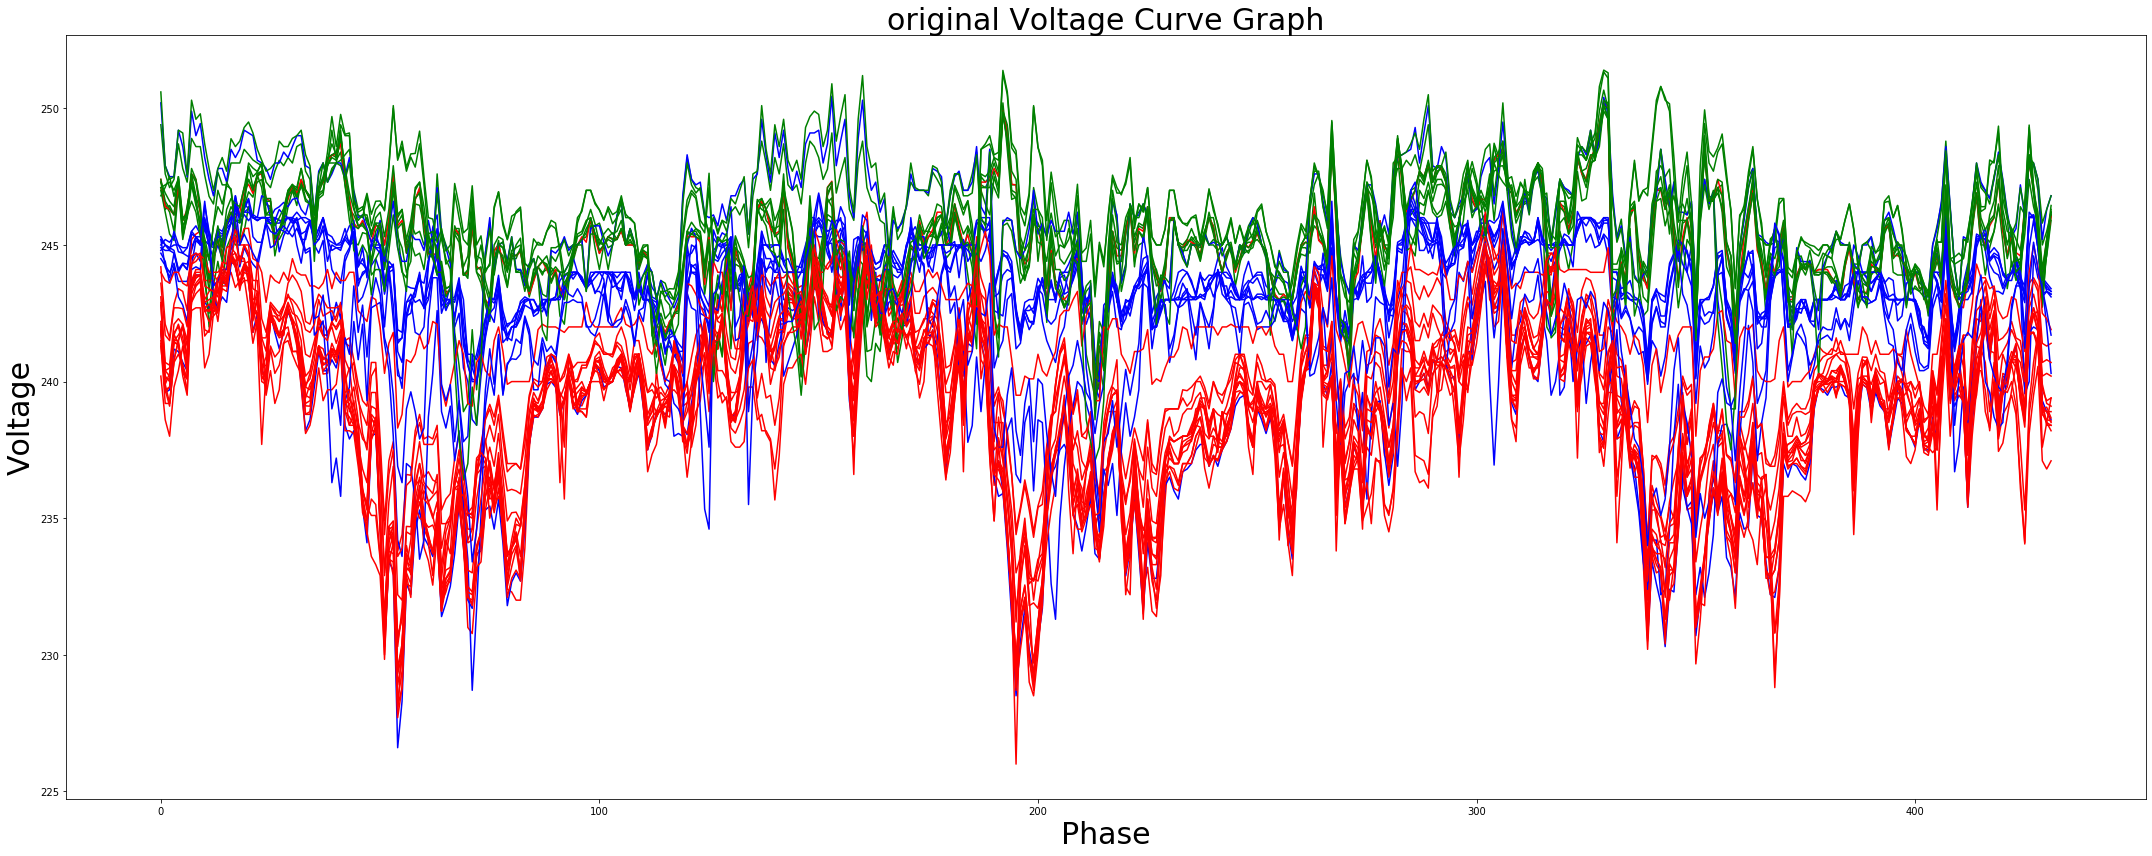

In [45]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['red','green','blue']
cluster_num = 3
x = range(432)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels'].values[0]
    y =[] 
    for j in range(432):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('original Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

#plot 层次聚类label

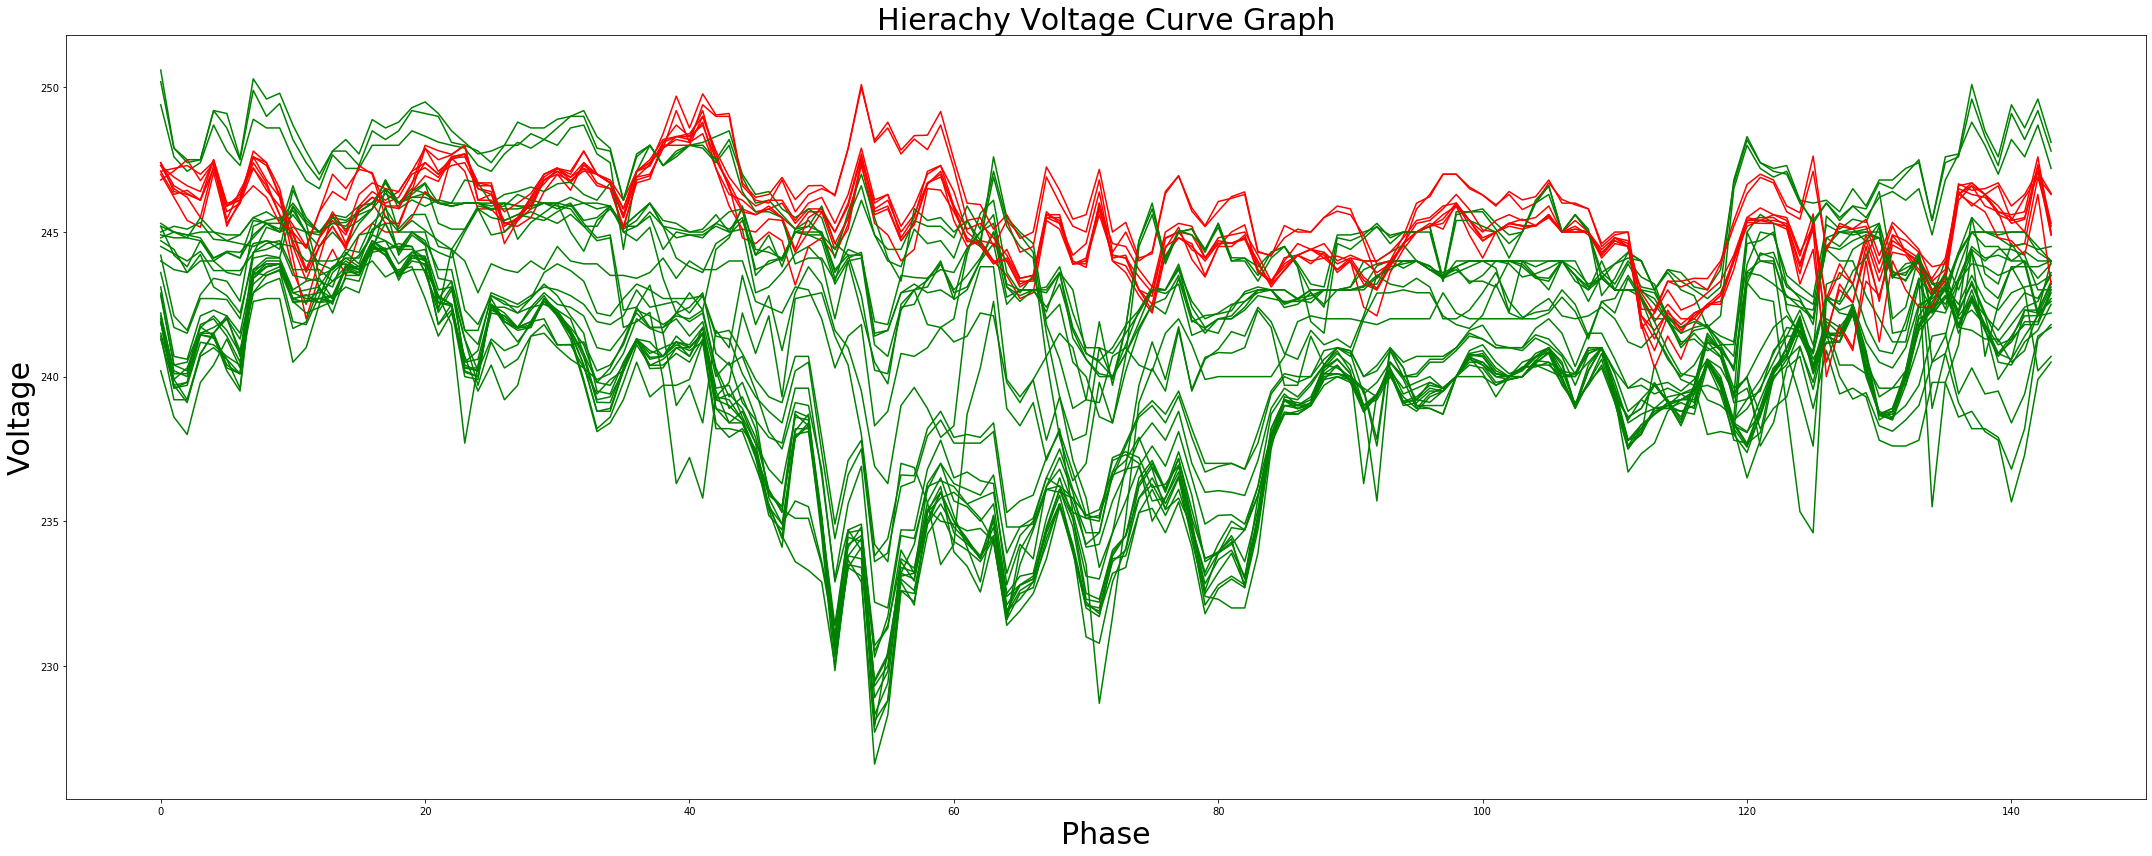

In [46]:
color_list = ['red','green','blue']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_hiera'].values[0]
    if idx > 2:
        idx = 2 #聚类需要分析idx=3的一个特殊情况
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('Hierachy Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

#plot kmeans label

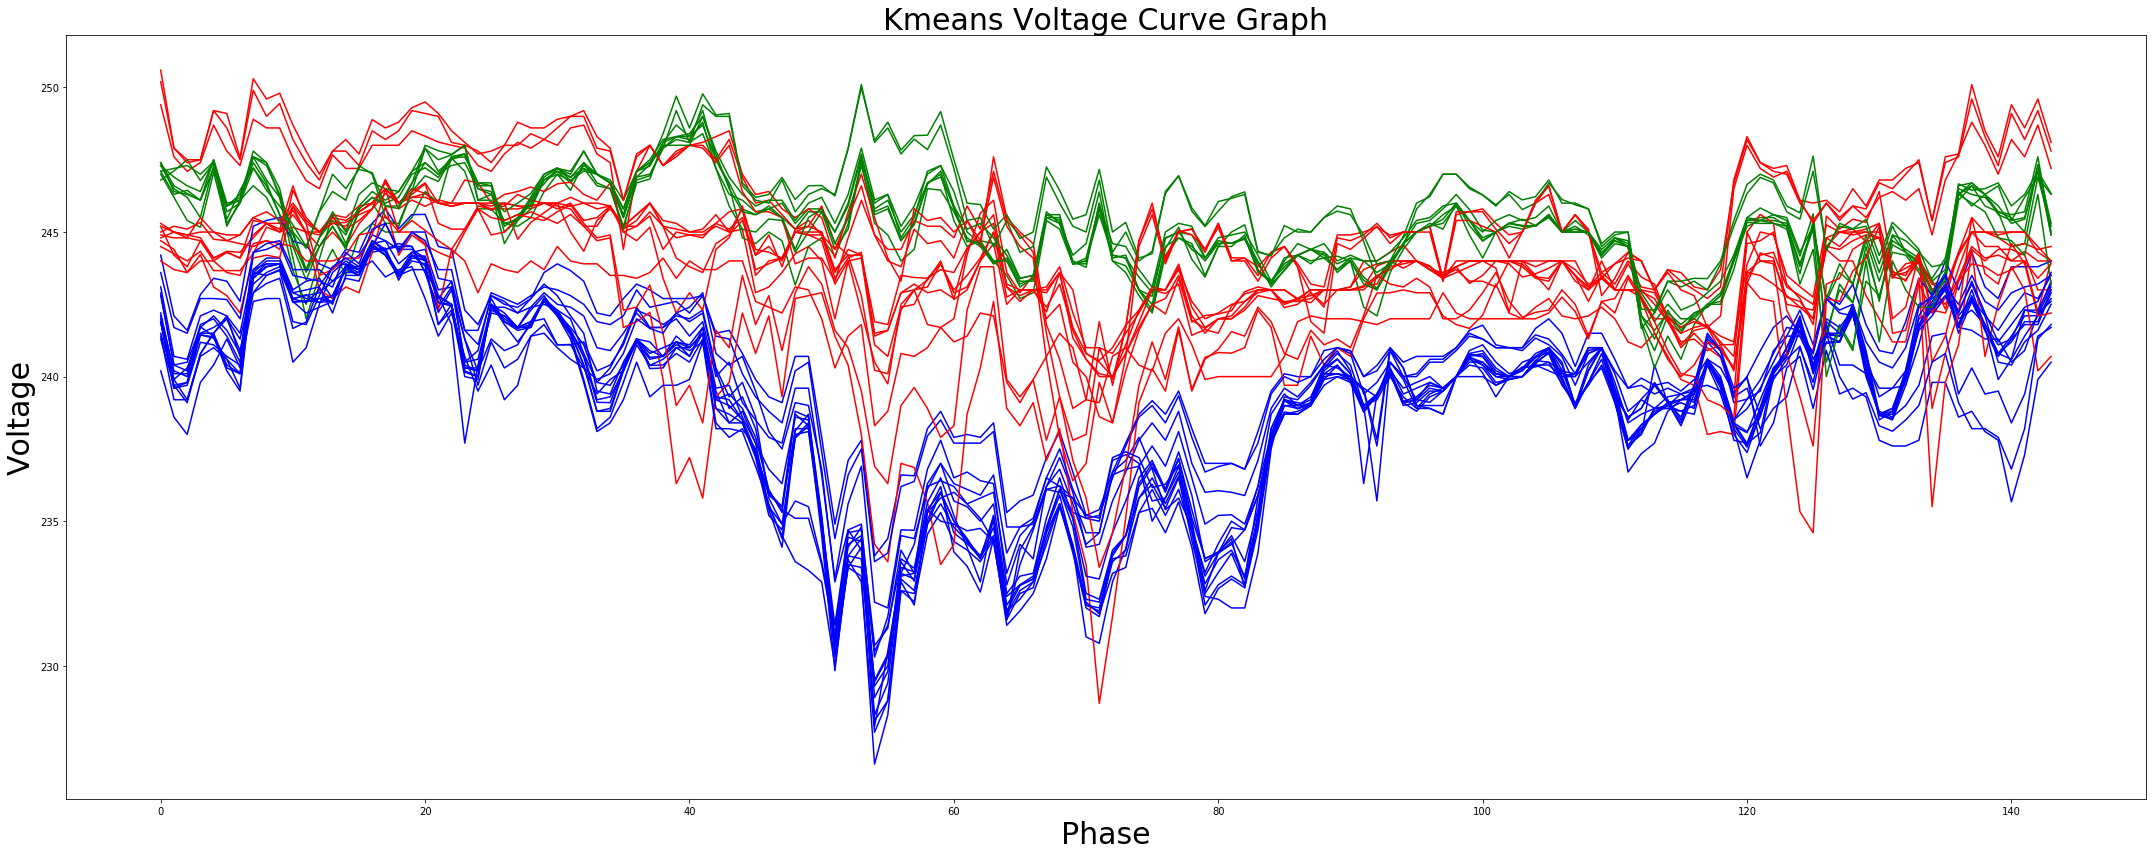

In [47]:
color_list = ['red','green','blue']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_kmeans'].values[0]
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('Kmeans Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# plot meanshift

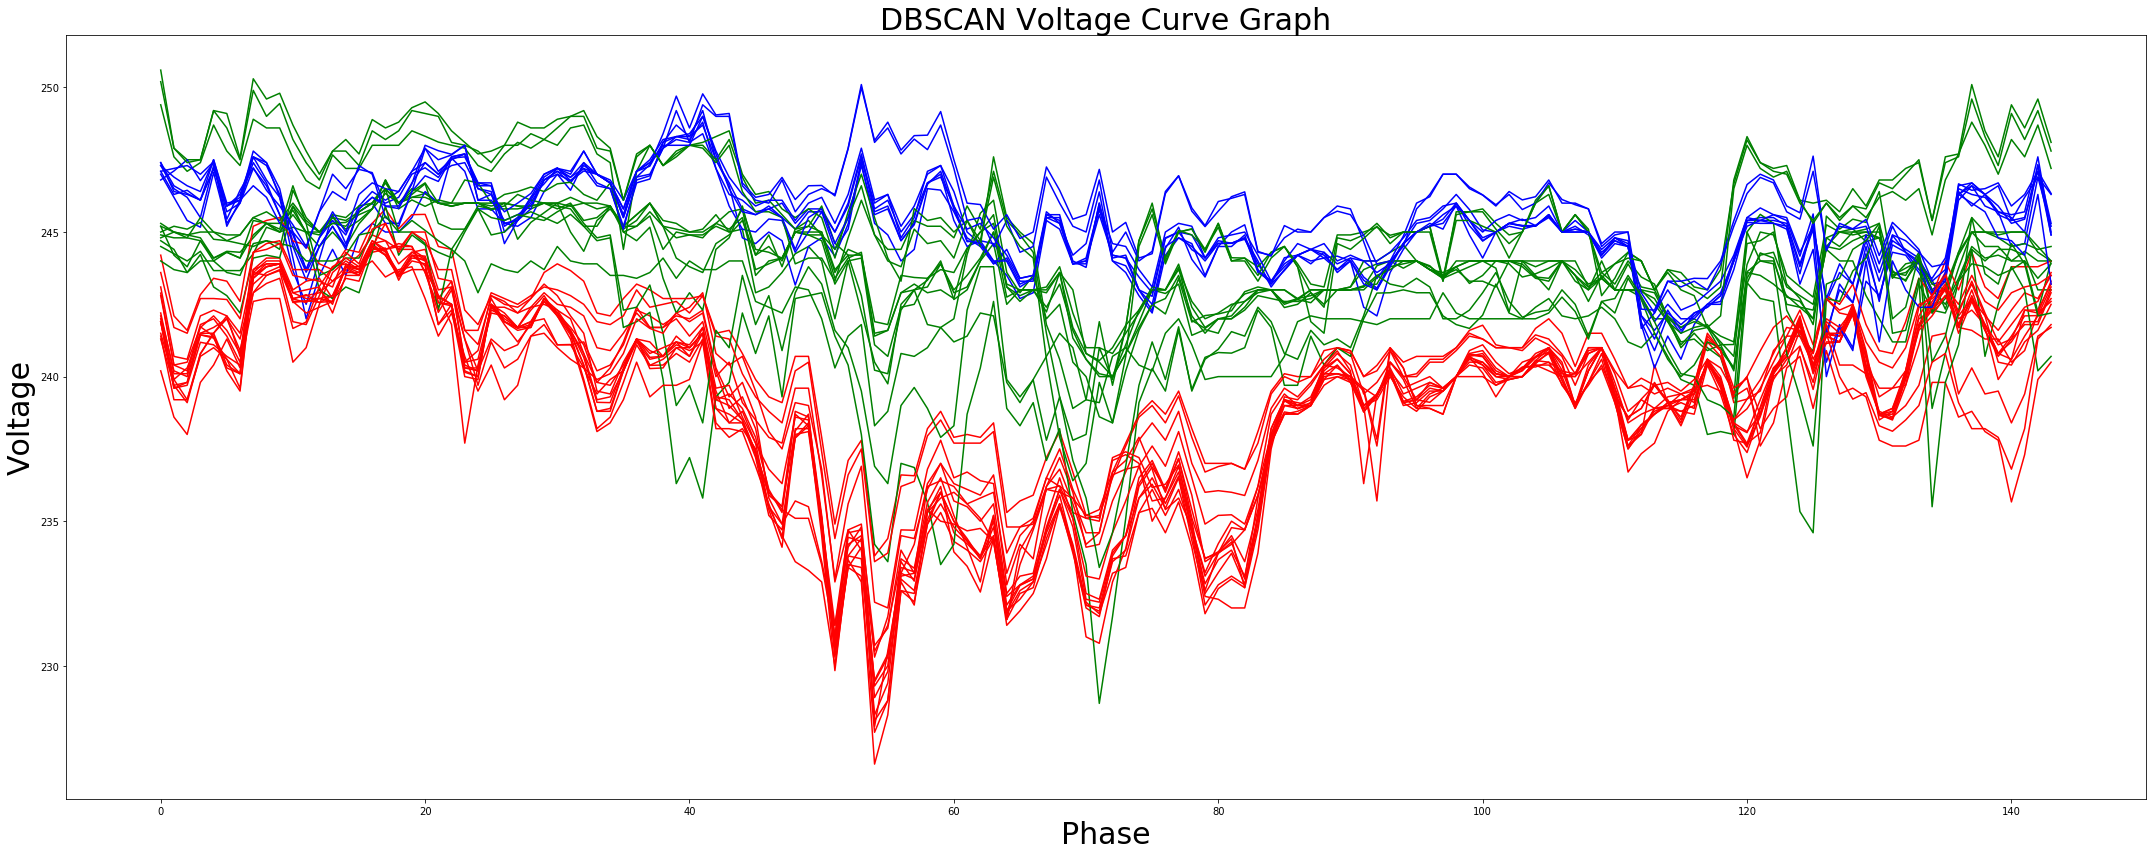

In [48]:
color_list = ['red','green','blue']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_meanshift'].values[0]
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('DBSCAN Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# plot DBSCAN

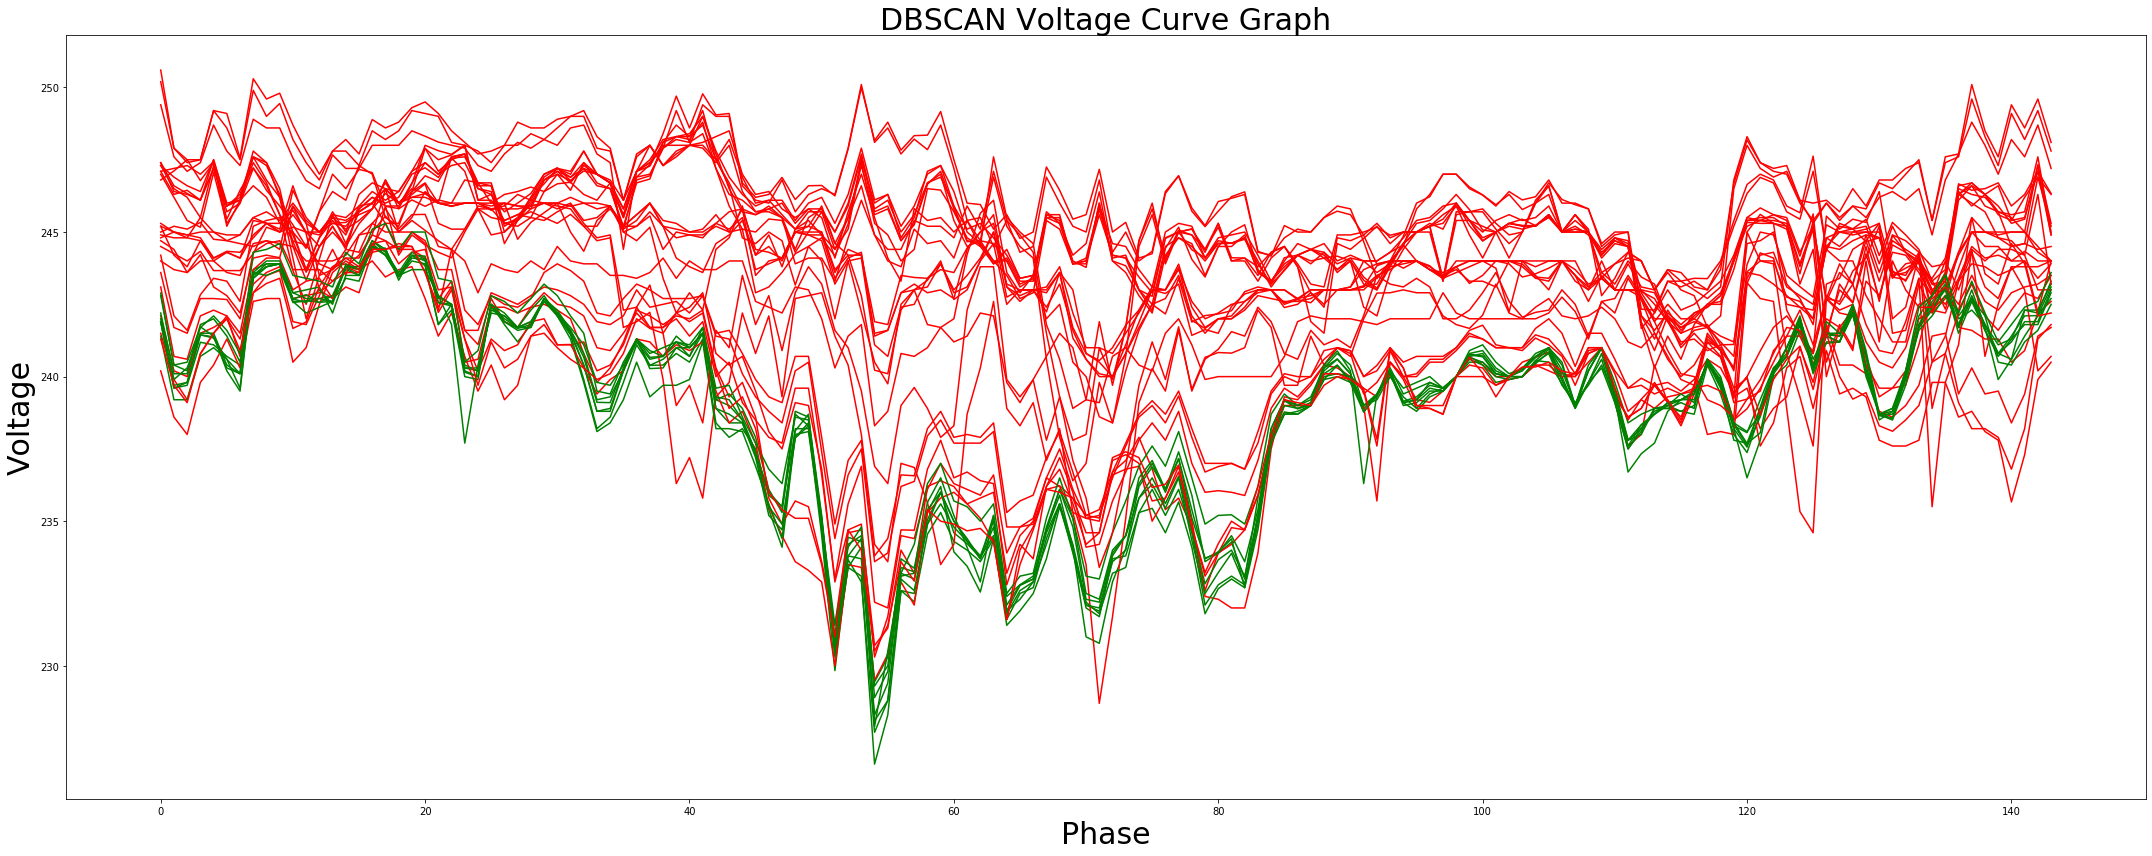

In [49]:
color_list = ['red','green','blue']
cluster_num = 3
x = range(144)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_dbscan'].values[0]
    y =[] 
    for j in range(144):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('DBSCAN Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# Confusion Matrix Kmeans

In [50]:
from sklearn.metrics import confusion_matrix
y_actu = data_ten_minutes['labels']
y_pred = data_ten_minutes['labels_kmeans']
confusion_matrix(y_actu, y_pred)

array([[ 1,  1, 14],
       [ 2,  7,  0],
       [ 9,  0,  1]], dtype=int64)

In [51]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_kmeans'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted  0  1   2
Actual             
0          1  1  14
1          2  7   0
2          9  0   1

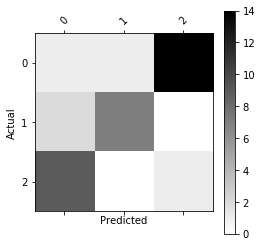

In [52]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

# Confusion Matrix Mean Shift

In [53]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_meanshift'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted   0  1  2
Actual             
0          14  1  1
1           0  2  7
2           1  9  0

# Confusion Matrix DBSCAN

In [54]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_dbscan'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted  0  1
Actual         
0          9  7
1          9  0
2          9  1